<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/LinearSVMFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM classification accuracy 0.0


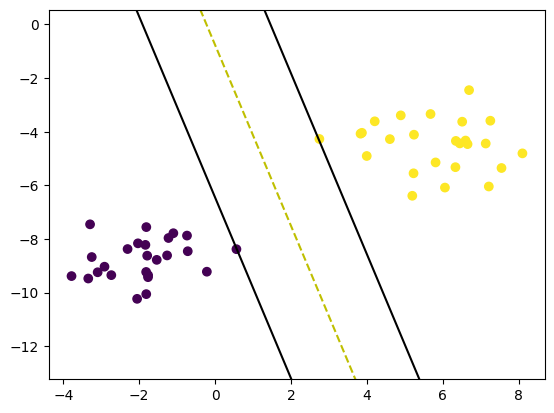

In [ ]:
from typing import LiteralString
import numpy as np

class SVM:
  def __init__(self, learning_rate = 0.001, lambda_param = 0.01, n_iters = 1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    n_samples ,n_features = X.shape
    y_ = np.where(y <= 0, 1, -1)

    self.w = np.zeros(n_features)
    self.b = 0
    import ipdb
    # ipdb.set_trace()
    for _ in range(self.n_iters):
      for idx, x_1 in enumerate(X):
        condition = y_[idx] * (np.dot(x_1, self.w)-self.b) >= 1
        # ipdb.set_trace()
        if condition:
          self.w = self.w - self.lr * (2 * self.lambda_param * self.w)
        else:
          self.w = self.w - self.lr * (2 * self.lambda_param * self.w - np.dot(x_1, y_[idx]))
          self.b = self.b - self.lr * y_[idx]

  def predict(self, X):
    approx = np.dot(X, self.w) - self.b
    return np.sign(approx)


if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(n_samples= 50, n_features= 2 , centers = 2, cluster_std= 1.05, random_state = 40)

    y = np.where(y == 0, -1, 1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    clf = SVM()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    print("SVM classification accuracy", accuracy(y_test, predictions))

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()

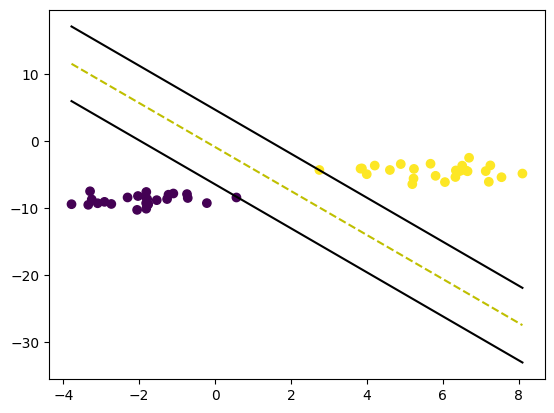

In [ ]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Ensure labels are -1 and 1
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Only regularization update
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Regularization + hinge loss update
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

import matplotlib.pyplot as plt
from sklearn import datasets

# 1. Generate synthetic data
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

# 2. Train model
clf = LinearSVM()
clf.fit(X, y)

# 3. Visualization
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    # Decision Boundary (y=0)
    y1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    y1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
    ax.plot([x0_1, x0_2], [y1_1, y1_2], "y--", label="Hyperplane")

    # Margins (y=1 and y=-1)
    y_m1 = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    y_m2 = get_hyperplane_value(x0_2, clf.w, clf.b, -1)
    ax.plot([x0_1, x0_2], [y_m1, y_m2], "k")

    y_p1 = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    y_p2 = get_hyperplane_value(x0_2, clf.w, clf.b, 1)
    ax.plot([x0_1, x0_2], [y_p1, y_p2], "k")

    plt.show()

visualize_svm()
